#Analysis of Work Hours
This workbook considers the claims in the BLS data summary page and tries to see further meaning in the data beyond the story presented there.

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline
import atus_tools
import john_list

In [2]:
summary = pd.read_csv("../atusdata/atussum_2013/atussum_2013.dat")       # Activity Summary

Capabilities needed for the BLS claims
- hours worked per day (05 category)
- men vs women (TESEX)
- employed vs unemployed (TELFS)
- employed full time


In [3]:
employment_types = ["Employed", "Absent", "Unemployed, Laid Off", "Unemployed, Looking", "Not in Labor Force"]

In [4]:
def sort_series_vc(a_series):
    '''Returns a list of the value counts ordered by index, instead of the default of occurances'''
    return a_series.value_counts().reindex_axis(sorted(a_series.value_counts().keys()))

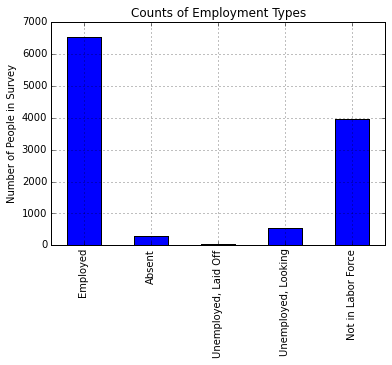

In [5]:
sort_series_vc(summary['TELFS']).plot(kind="bar")
plt.title("Counts of Employment Types")
plt.ylabel("Number of People in Survey")
plt.xticks([0, 1, 2, 3, 4], employment_types)
plt.show()

This bar chart breaks down the number of people surveyed by employment type. The most major fractions comprise of people employed and people not in the labor force. The number of people absent and looking for work also offer a reasonably substantial sample size. Going into the Laid Off category might present problems with statistical meaningfulness.

In [6]:
len(summary[(summary.TELFS == 4) | (summary.TELFS == 3)]) # count of unemployed people

596

In [7]:
employed_men = summary[(summary.TELFS == 1) | (summary.TESEX == 1)] # employed men
print(employed_men["t050101"].mean() / 60 * 7) # hours per week in main job
employed_women = summary[(summary.TELFS == 1) | (summary.TESEX == 2)]
print(employed_women["t050101"].mean() / 60 * 7)

23.286035281
20.3296852123


In [8]:
def cat_descriptions(activity_code):
    codes = atus_tools.activity_columns(summary, activity_code)
    out_list = []
    for i in range(len(john_list.atus_codes_list)):
        c, d = john_list.atus_codes_list[i]
        if c in codes:
            out_list.append(d)
    return out_list

This is a helper function created so that the text descriptions of the types of work can be printed out on the plot.

In [9]:
women_work_hours = employed_women[atus_tools.activity_columns(summary, "05")].mean() / 60 * 7
men_work_hours = employed_men[atus_tools.activity_columns(summary, "05")].mean() / 60 * 7
print_cols = cat_descriptions("05")

In [10]:
women_work_hours.index = print_cols
men_work_hours.index = print_cols

In [11]:
work_df = pd.concat([men_work_hours, women_work_hours], axis=1)
work_df.columns = ["men", "women"]

In the above commands, the "summary" dataframe is parsed into men and women dataframes (limited to people actively working) that contain the average hours worked per week in each of the working categories. Then, these are glued back together into a dataframe which can be plotted as a bar chart with the men and women side-by-side.

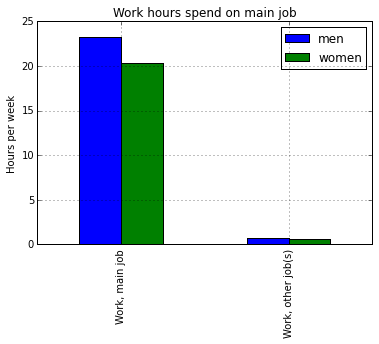

In [12]:
work_df.ix[:2].plot(kind="bar")
plt.title("Work hours spend on main job")
plt.ylabel("Hours per week")
plt.show()

For the main job and side-jobs, the BLS narraitive looks fairly straightforward. Men generally work longer than women.

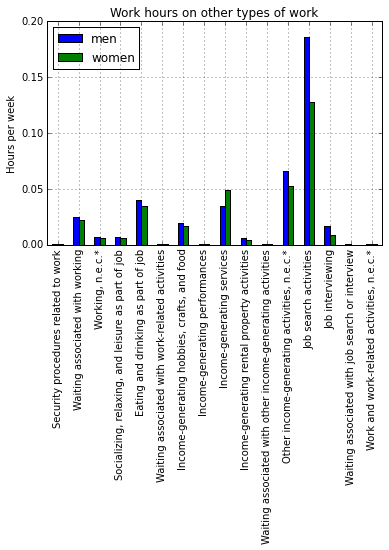

In [13]:
work_df.ix[2:].plot(kind="bar")
plt.title("Work hours on other types of work")
plt.ylabel("Hours per week")
plt.show()

These are all the other less-substantial forms of work counted in the survey. Men still work longer in many of them, but they also (reasonably, perhaps) spend more time eating at work, for instance. Women spend more time in income-generating services, which is interesting, but this level of data might not be highly significant.

In [14]:
NLF_men = summary[(summary.TELFS == 5) | (summary.TESEX == 1)] # employed men
print(NLF_men["t050101"].mean() / 60 * 7) # hours per week in main job
NLF_women = summary[(summary.TELFS == 5) | (summary.TESEX == 2)]
print(NLF_women["t050101"].mean() / 60 * 7)

14.2576184211
11.2761268817


Here, we see that people not in the labor force do work substantially, even though not full time

In [15]:
women_work_hours = NLF_women[atus_tools.activity_columns(summary, "05")].mean() / 60 * 7
men_work_hours = NLF_men[atus_tools.activity_columns(summary, "05")].mean() / 60 * 7
print_cols = cat_descriptions("05")

In [16]:
women_work_hours.index = print_cols
men_work_hours.index = print_cols
work_df = pd.concat([men_work_hours, women_work_hours], axis=1)
work_df.columns = ["men", "women"]

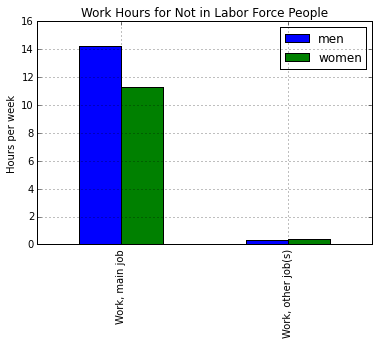

In [17]:
work_df.ix[:2].plot(kind="bar")
plt.title("Work Hours for Not in Labor Force People")
plt.ylabel("Hours per week")
plt.show()

The picture is still largely the same for people not in the labor force - men work longer than women. Confusingly, women not in the labor force put more hours into secondary jobs than men.

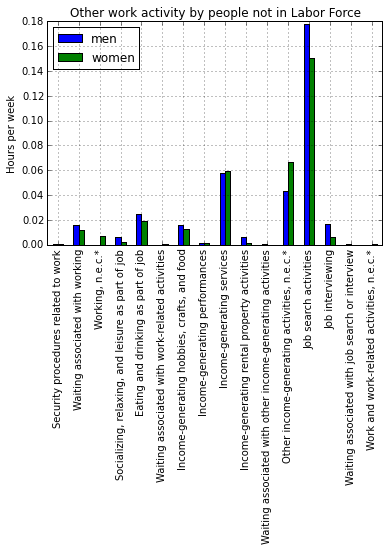

In [69]:
work_df.ix[2:].plot(kind="bar")
plt.title("Other work activity by people not in Labor Force")
plt.ylabel("Hours per week")
plt.show()

In [17]:
atus_tools.activity_columns(summary, "05")

['t050101',
 't050102',
 't050103',
 't050104',
 't050199',
 't050201',
 't050202',
 't050205',
 't050301',
 't050302',
 't050303',
 't050304',
 't050305',
 't050399',
 't050401',
 't050403',
 't050404',
 't059999']

In [7]:
atus_tools.related_cols2("work")

[('t0201', 'Housework'),
 ('t020199', 'Housework, n.e.c.*'),
 ('t030201', 'Homework (hh children)'),
 ('t040201', 'Homework (nonhh children)'),
 ('t040501', 'Housework, cooking, & shopping assistance for nonhh adults'),
 ('t040506', 'Household management & paperwork assistance for nonhh adults'),
 ('t05', 'Work & Work-Related Activities'),
 ('t0501', 'Working'),
 ('t050101', 'Work, main job'),
 ('t050102', 'Work, other job(s)'),
 ('t050103', 'Security procedures related to work'),
 ('t050104', 'Waiting associated with working'),
 ('t050199', 'Working, n.e.c.*'),
 ('t0502', 'Work-Related Activities'),
 ('t050205', 'Waiting associated with work-related activities'),
 ('t050299', 'Work-related activities, n.e.c.*'),
 ('t0599', 'Work and Work-Related Activities, n.e.c.*'),
 ('t059999', 'Work and work-related activities, n.e.c.*'),
 ('t0603', 'Research/Homework'),
 ('t060301',
  'Research/homework for class for degree, certification, or licensure'),
 ('t060302', 'Research/homework for class